# MSCS 634 – Project Deliverable 4
## Final Insights, Recommendations, and Presentation  
**Name**: Pawan Pandey  
**Course**: Advanced Big Data and Data Mining (MSCS-634-B01)  
**Instructor**: Satish Penmatsa  

### Import Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, mean_squared_error, r2_score, ConfusionMatrixDisplay, f1_score)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style="whitegrid")

### Load Dataset & Overview

In [15]:
# Load dataset
df = pd.read_csv("heart.csv")

# Basic Info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Preprocessing

In [17]:
# Check missing values & duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Separate features & target
X = df.drop("target", axis=1)
y = df["target"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling for models needing it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplicate rows: 723


### Feature Engineering

In [18]:
# Handle missing values (if needed)
df = df.dropna()

# Define X and y
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Exploratory Data Analysis (EDA)

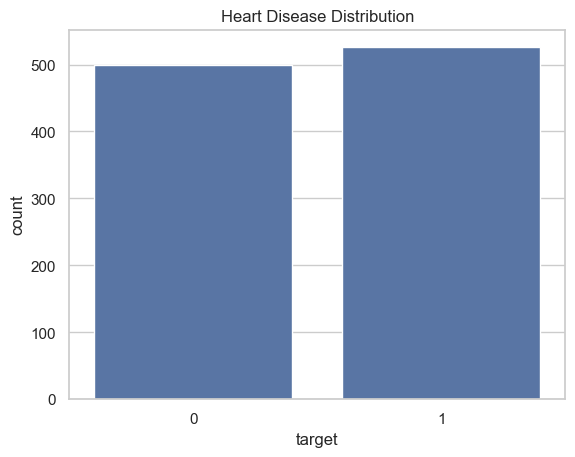

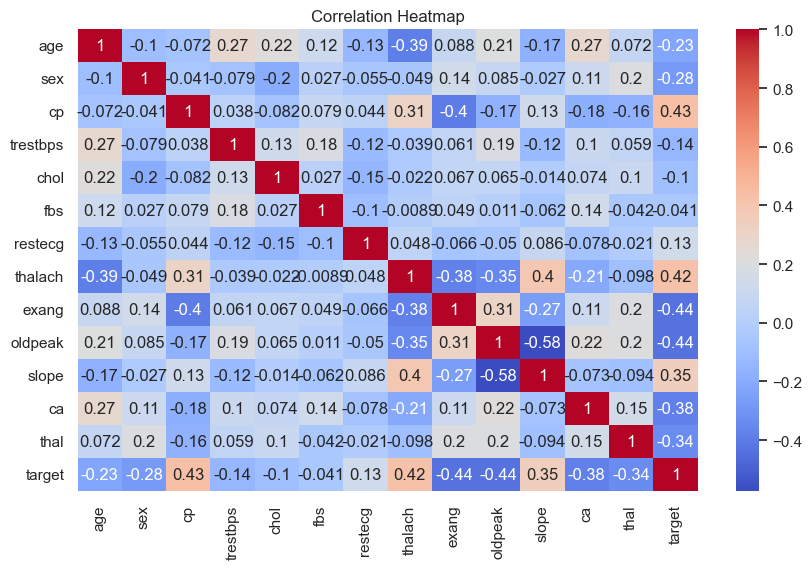

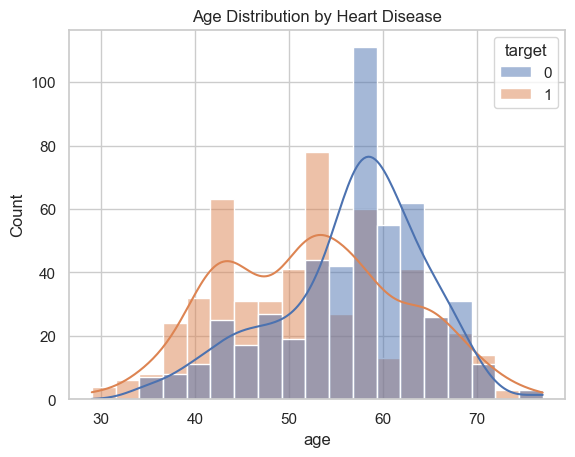

In [19]:
# Target distribution
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Age distribution by target
sns.histplot(data=df, x="age", hue="target", kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

### Regression Models (for exploration)

In [20]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Fix for older sklearn versions: manually compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

Linear Regression -> RMSE: 0.384, R²: 0.410
Ridge Regression -> RMSE: 0.384, R²: 0.410
Lasso Regression -> RMSE: 0.410, R²: 0.329


### Classification Models


Logistic Regression
Accuracy: 0.795
F1-Score: 0.811
AUC: 0.879


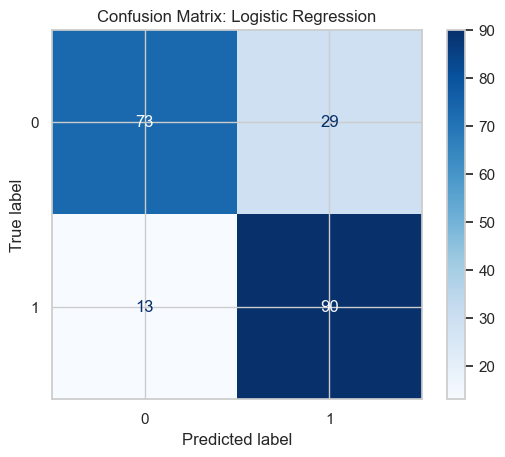


KNN
Accuracy: 0.834
F1-Score: 0.844
AUC: 0.949


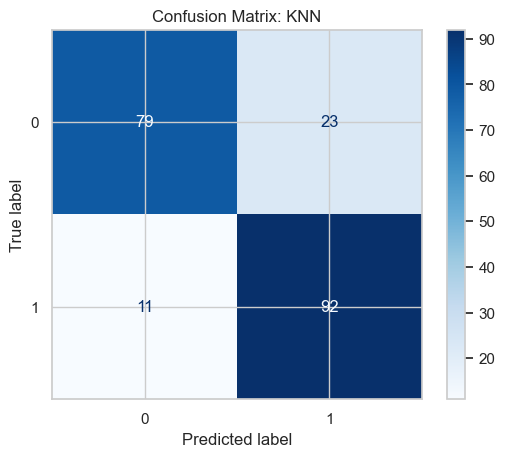


Decision Tree
Accuracy: 0.985
F1-Score: 0.985
AUC: 0.985


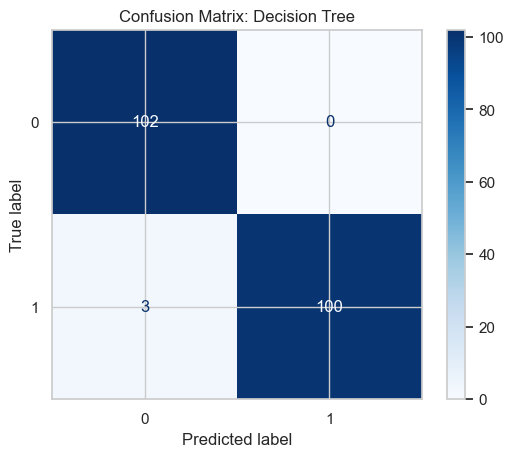


Random Forest
Accuracy: 0.985
F1-Score: 0.985
AUC: 1.000


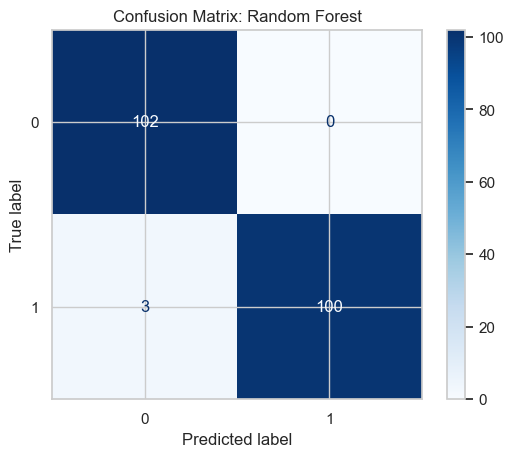


SVM
Accuracy: 0.888
F1-Score: 0.894
AUC: 0.963


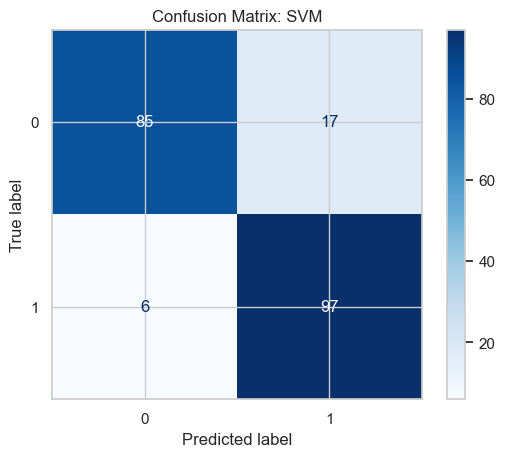


Naive Bayes
Accuracy: 0.800
F1-Score: 0.818
AUC: 0.871


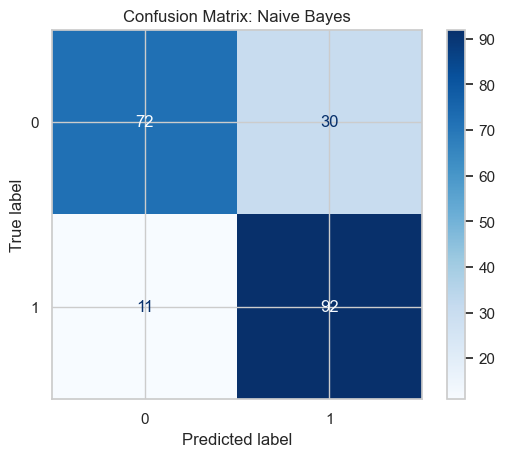

In [21]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

for name, model in classifiers.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        auc = roc_auc_score(y_test, y_proba)
    else:  # Some models like SVM may not have predict_proba
        auc = roc_auc_score(y_test, model.decision_function(X_test_scaled))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC: {auc:.3f}")
    
    # Plot with title
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

### Clustering (K-Means)

Silhouette Score: 0.16504632756514673


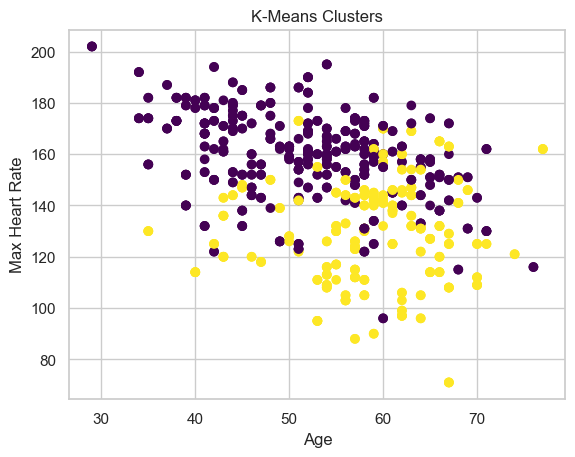

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Silhouette Score
score = silhouette_score(X_train_scaled, clusters)
print("Silhouette Score:", score)

# Visualize Clusters (age vs thalach)
plt.scatter(X_train["age"], X_train["thalach"], c=clusters, cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("K-Means Clusters")
plt.show()

### Association Rule Mining

In [23]:
# Convert categorical data for Apriori (discretize some features)
df_assoc = df.copy()
df_assoc["chol_high"] = df_assoc["chol"] > 240
df_assoc["bp_high"] = df_assoc["trestbps"] > 140

transactions = df_assoc[["chol_high","bp_high","target"]].astype(str).values.tolist()

te = TransactionEncoder()
te_data = te.fit_transform(transactions)
df_te = pd.DataFrame(te_data, columns=te.columns_)

frequent_items = apriori(df_te, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules.sort_values("confidence", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(1),(False),0.513171,0.884878,0.474146,0.923954,1.044160,1.0,0.020053,1.513854,0.086873,0.513200,0.339434,0.729893
1,(0),(True),0.486829,0.587317,0.326829,0.671343,1.143067,1.0,0.040906,1.255663,0.243896,0.437337,0.203608,0.613911
5,"(0, False)",(True),0.410732,0.587317,0.250732,0.610451,1.039390,1.0,0.009502,1.059387,0.064312,0.335509,0.056058,0.518681
0,(True),(0),0.587317,0.486829,0.326829,0.556478,1.143067,1.0,0.040906,1.157037,0.303285,0.437337,0.135723,0.613911
3,(False),(1),0.884878,0.513171,0.474146,0.535832,1.044160,1.0,0.020053,1.048822,0.367371,0.513200,0.046550,0.729893
